# Random Forest

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [22]:
# Load the dataset
file_path = 'Banduan_v2.xlsx' 
data = pd.read_excel(file_path)

# Define a function to categorize the values into bins
def bin_values(value, bin_size):
    """Bins the given value according to the bin_size."""
    return ((value - 1) // bin_size) * bin_size + 1

# Apply binning to 'umur' and 'tempoh_hukuman'
# Scale is 5 (1-5,6-10,etc)
bin_size = 5
data['umur_binned'] = data['umur'].apply(lambda x: bin_values(x, bin_size))
data['tempoh_hukuman_binned'] = data['tempoh_hukuman'].apply(lambda x: bin_values(x, bin_size))

# Drop the specified columns including the original 'umur' and 'tempoh_hukuman'
data_cleaned = data.drop(['id_banduan','tarikh_masuk', 'status', 'tarikh_status', 'penyakit', 'rawatan', 'umur', 'tempoh_hukuman'], axis=1)

# Encode categorical features and convert the target variable to binary
data_cleaned = pd.get_dummies(data_cleaned, columns=data_cleaned.columns.drop('banduan_berulang_kali'))
data_cleaned['banduan_berulang_kali'] = data_cleaned['banduan_berulang_kali'].map({'Ya': 1, 'Tidak': 0})

In [23]:
# Balance the dataset
df_majority = data_cleaned[data_cleaned.banduan_berulang_kali==0]
df_minority = data_cleaned[data_cleaned.banduan_berulang_kali==1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=int(len(df_majority)/2), random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Split the upsampled dataset into features and target variable
X = df_upsampled.drop('banduan_berulang_kali', axis=1)
y = df_upsampled['banduan_berulang_kali']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})


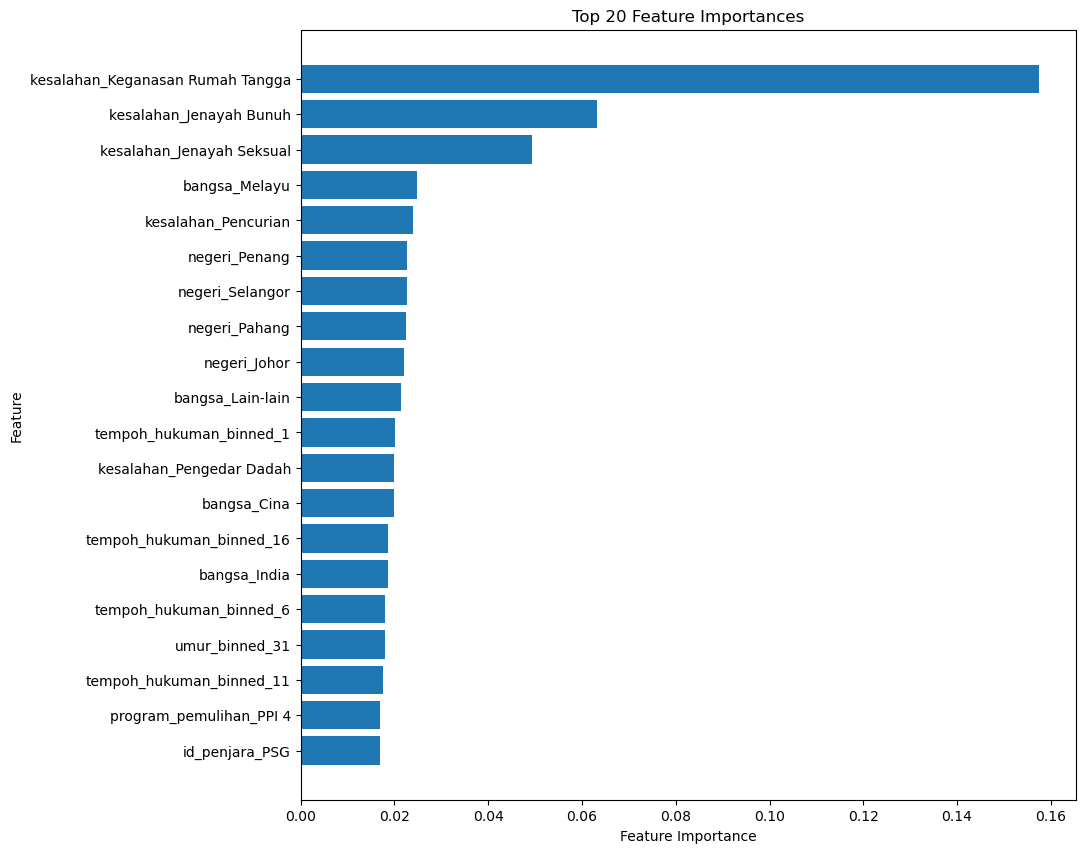

In [24]:
# Sort features by importance
features_sorted = features.sort_values(by='Importance', ascending=False)

# Define the number of top features to plot (you can adjust this number)
top_n_features = 20
features_sorted = features.sort_values(by='Importance', ascending=False)

# Plotting the feature importances for all features
plt.figure(figsize=(10, top_n_features / 2))  
plt.barh(features_sorted['Feature'][:top_n_features], features_sorted['Importance'][:top_n_features], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n_features} Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

# ADA Boost

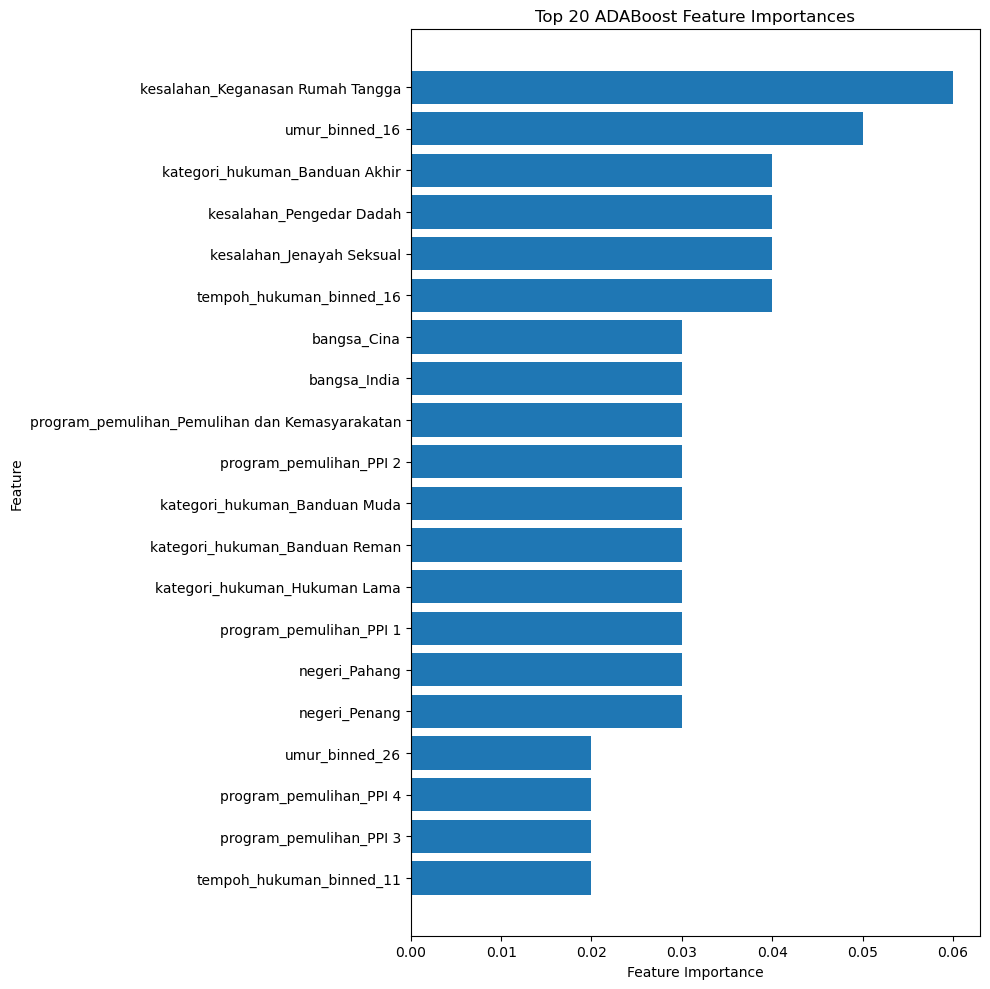

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Train the ADABoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

# Get feature importances
ada_importances = ada_classifier.feature_importances_
ada_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': ada_importances})

# Sort features by importance and get the top 20
ada_features_sorted = ada_features.sort_values(by='Importance', ascending=False).head(20)

# Plotting the feature importances for the top 20 ADABoost features
plt.figure(figsize=(10, 10))
plt.barh(ada_features_sorted['Feature'], ada_features_sorted['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 ADABoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4118, number of negative: 8238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 12356, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333279 -> initscore=-0.693390
[LightGBM] [Info] Start training from score -0.693390


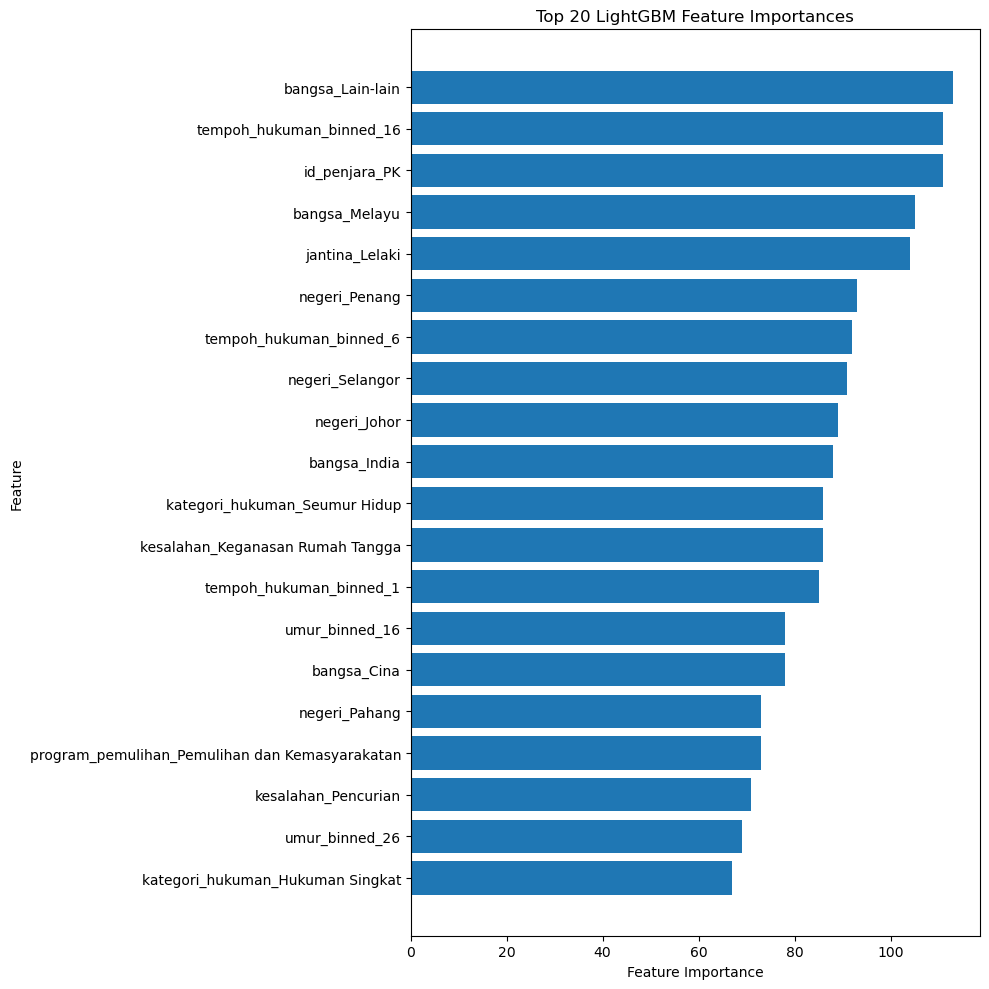

In [26]:
import lightgbm as lgb

# Train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_classifier.fit(X_train, y_train)

# Get feature importances
lgb_importances = lgb_classifier.feature_importances_
lgb_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_importances})

# Sort features by importance and get the top 20
lgb_features_sorted = lgb_features.sort_values(by='Importance', ascending=False).head(20)

# Plotting the feature importances for the top 20 LightGBM features
plt.figure(figsize=(10, 10))
plt.barh(lgb_features_sorted['Feature'], lgb_features_sorted['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 LightGBM Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# XGBoost

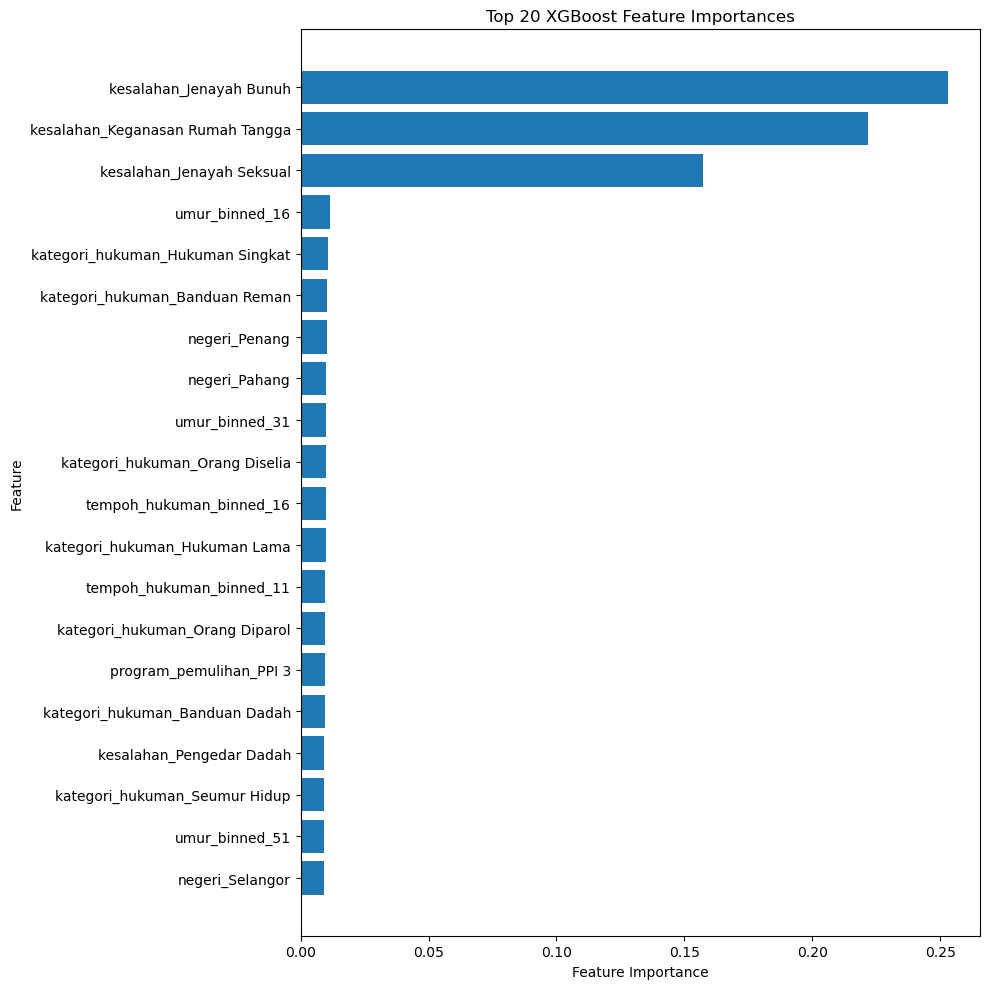

In [27]:
import xgboost as xgb


# Train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Get feature importances
xgb_importances = xgb_classifier.feature_importances_
xgb_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_importances})

# Sort features by importance and get the top 20
xgb_features_sorted = xgb_features.sort_values(by='Importance', ascending=False).head(20)

# Plotting the feature importances for the top 20 XGBoost features
plt.figure(figsize=(10, 10))
plt.barh(xgb_features_sorted['Feature'], xgb_features_sorted['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Accuracy 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb

# Calculate the accuracy
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy:.2f}')


# Predict and calculate accuracy
ada_predictions = ada_classifier.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print(f'ADABoost Classifier Accuracy: {ada_accuracy:.2f}')


# Predict and calculate accuracy
lgb_predictions = lgb_classifier.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print(f'LightGBM Classifier Accuracy: {lgb_accuracy:.2f}')

# Predict and calculate accuracy
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Classifier Accuracy: {xgb_accuracy:.2f}')

Random Forest Classifier Accuracy: 0.91
ADABoost Classifier Accuracy: 0.79
LightGBM Classifier Accuracy: 0.81
XGBoost Classifier Accuracy: 0.85


# Extract decision tree as an image

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [44]:
# Select a tree from the Random Forest model
selected_tree = rf_classifier.estimators_[0]

# Convert feature names to a list
feature_names_list = list(X_train.columns)

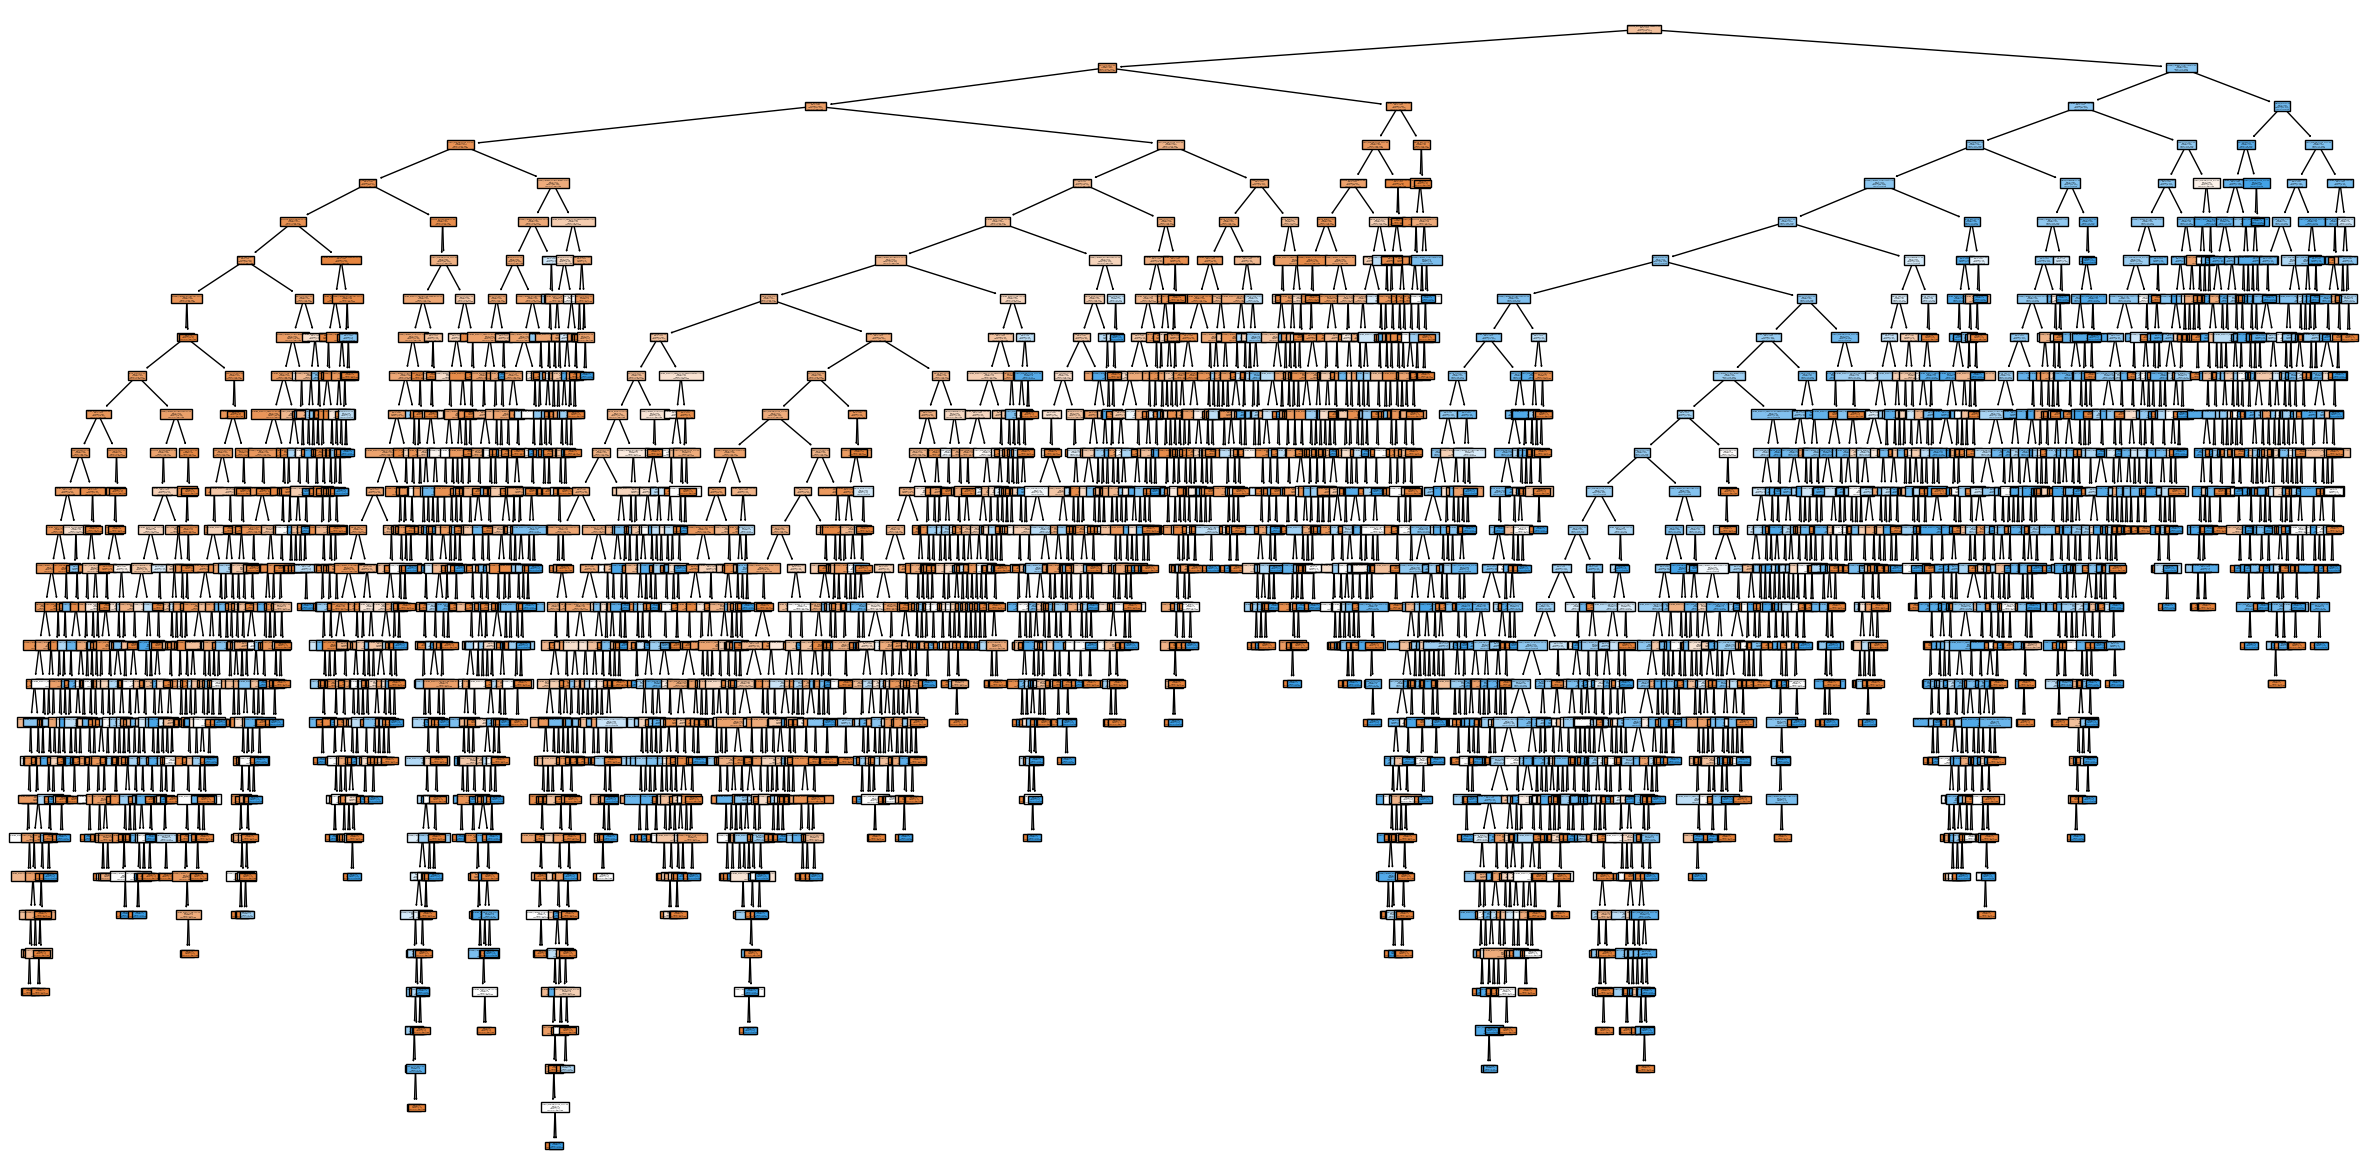

In [45]:
# Plot the decision tree

plt.figure(figsize=(30, 15))  # Adjust the size as needed
plot_tree(selected_tree, feature_names=feature_names_list, class_names=["Non-Repeating", "Repeating"], filled=True)
plt.savefig('tree_high_res.png', dpi=300)  # Save with high DPI
plt.show()

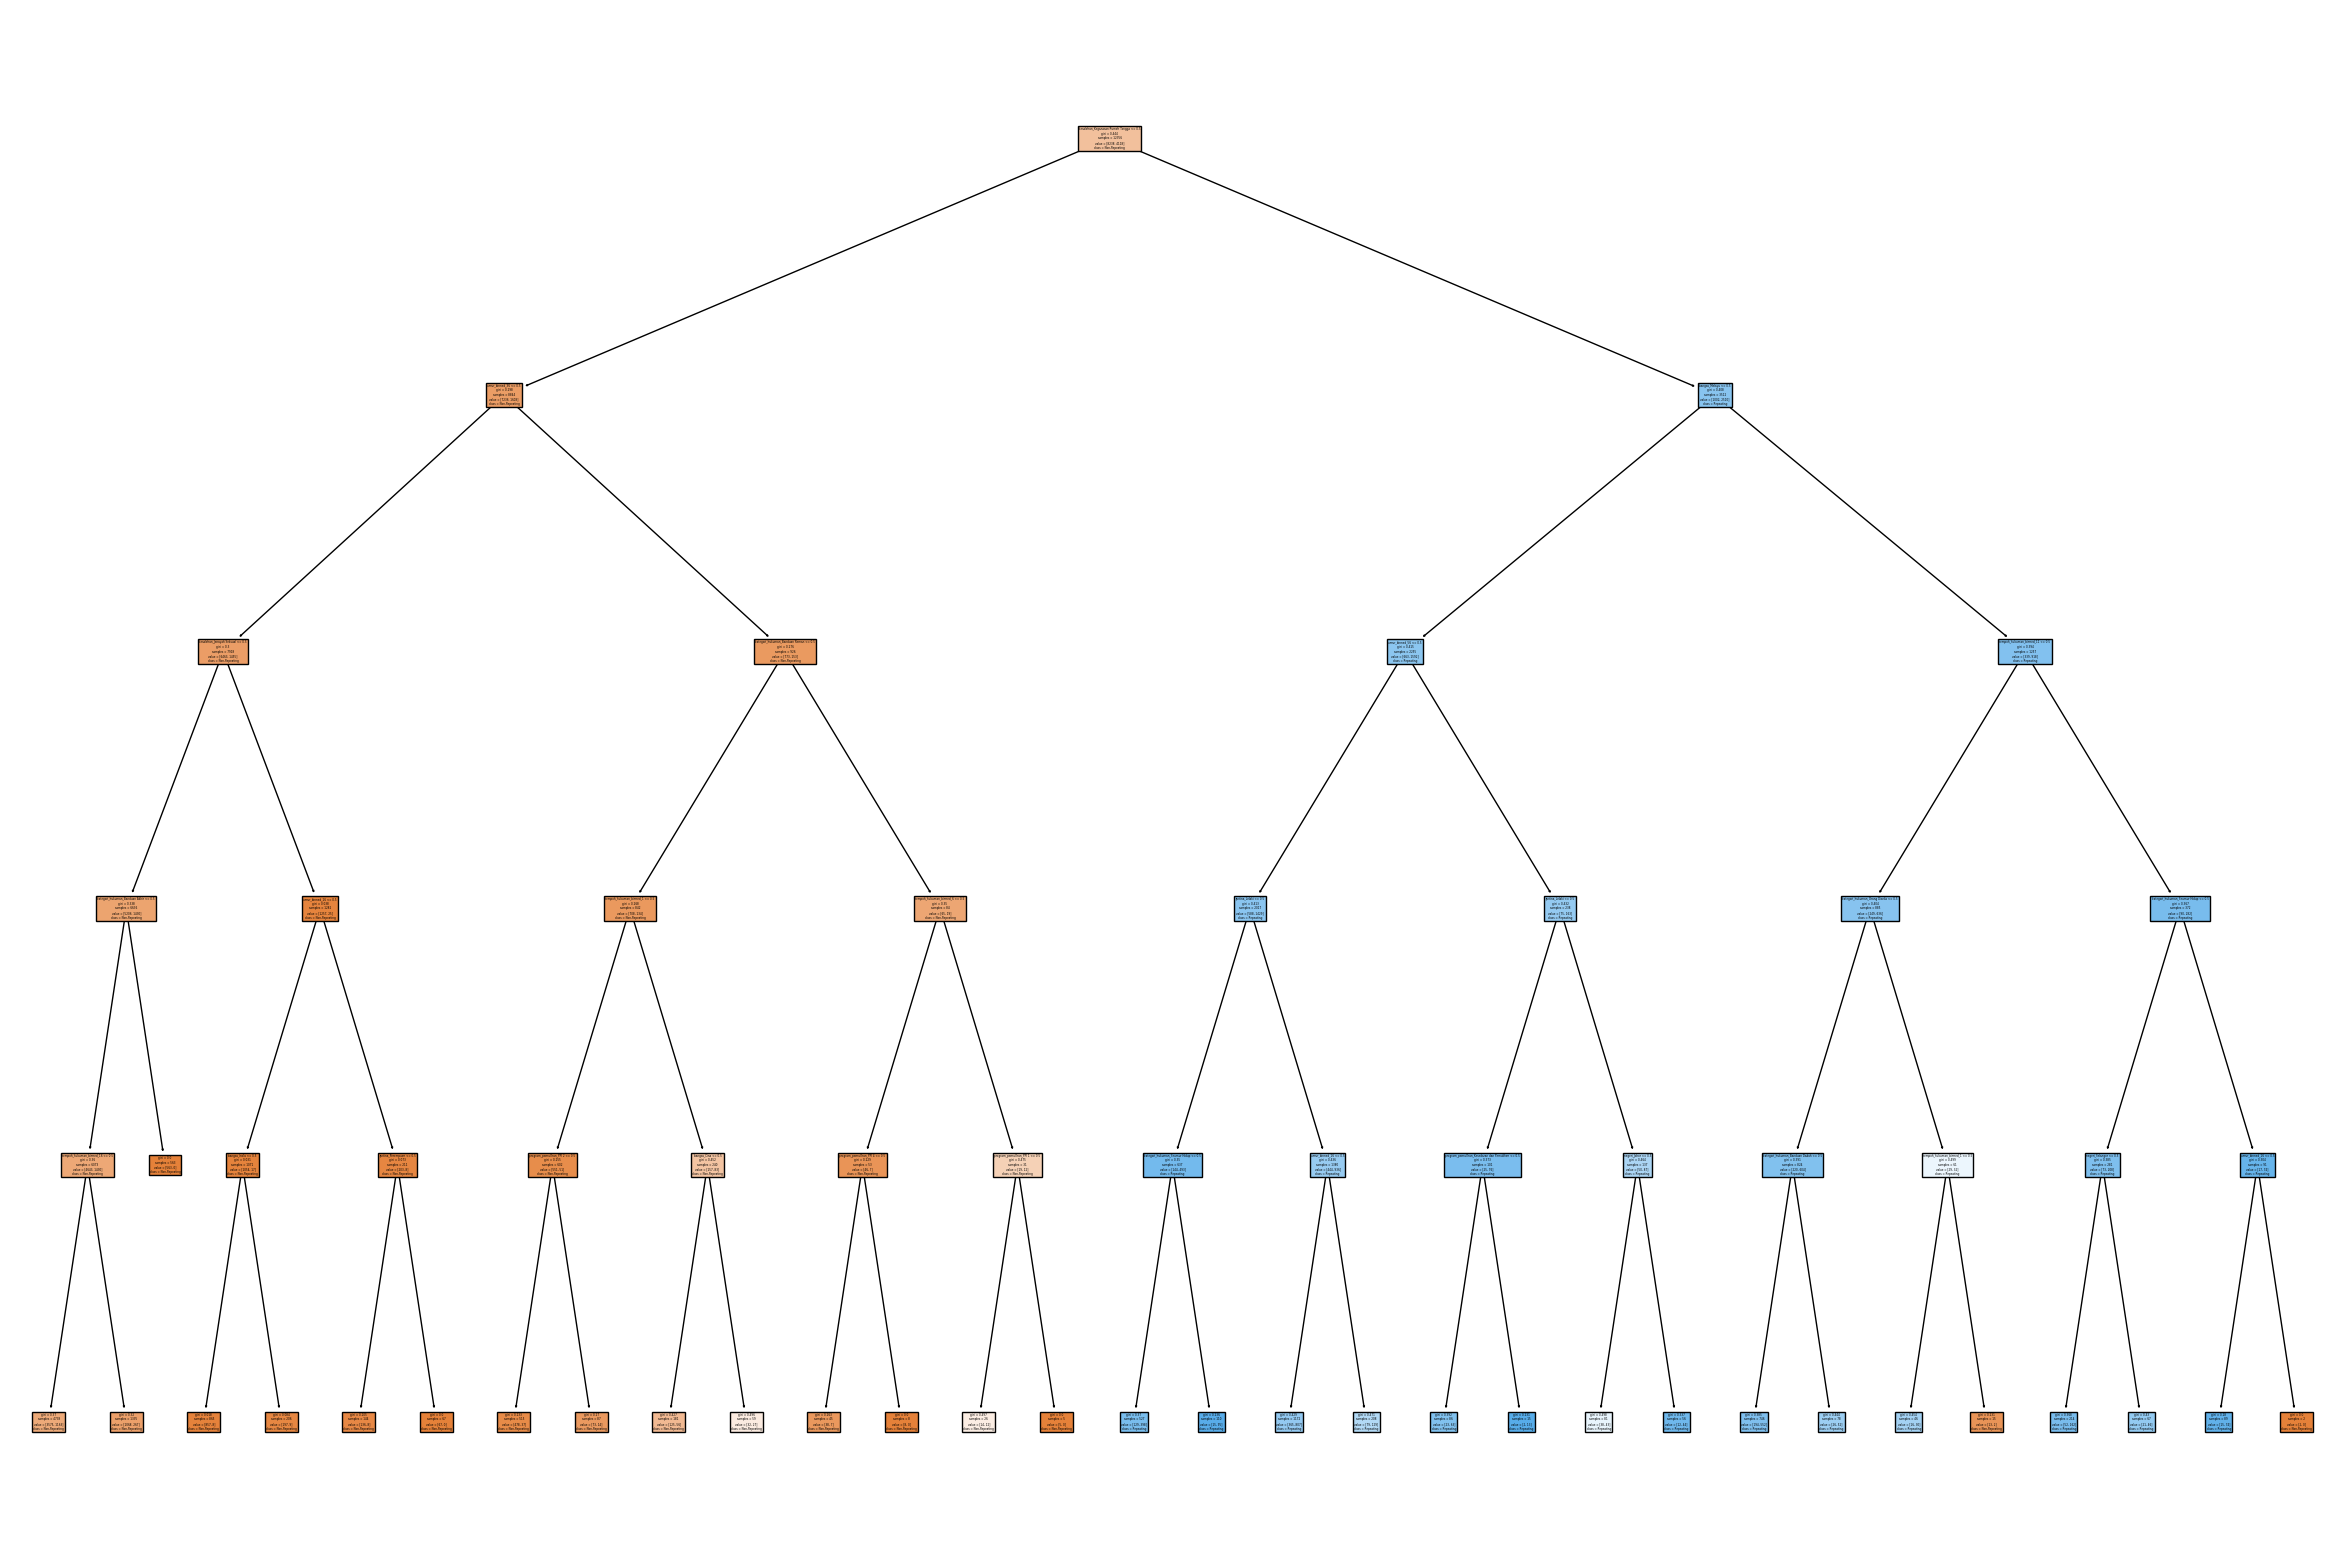

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Extract parameters from a tree in the RandomForest
tree_params = rf_classifier.estimators_[0].get_params()

# Update the 'max_depth' parameter in tree_params
tree_params['max_depth'] = 5

# Create a new DecisionTreeClassifier with updated parameters
simplified_tree = DecisionTreeClassifier(**tree_params)

# Fit the new tree with your training data
simplified_tree.fit(X_train, y_train)

# Convert feature names to a list
feature_names_list = list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(30, 20))  # Adjust the size as needed
plot_tree(simplified_tree, feature_names=feature_names_list, class_names=["Non-Repeating", "Repeating"], filled=True)

# Save with high DPI
plt.savefig('C:/Users/DataMicron/Desktop/decision_tree_high_res.png', dpi=700)

# Show the plot
plt.show()

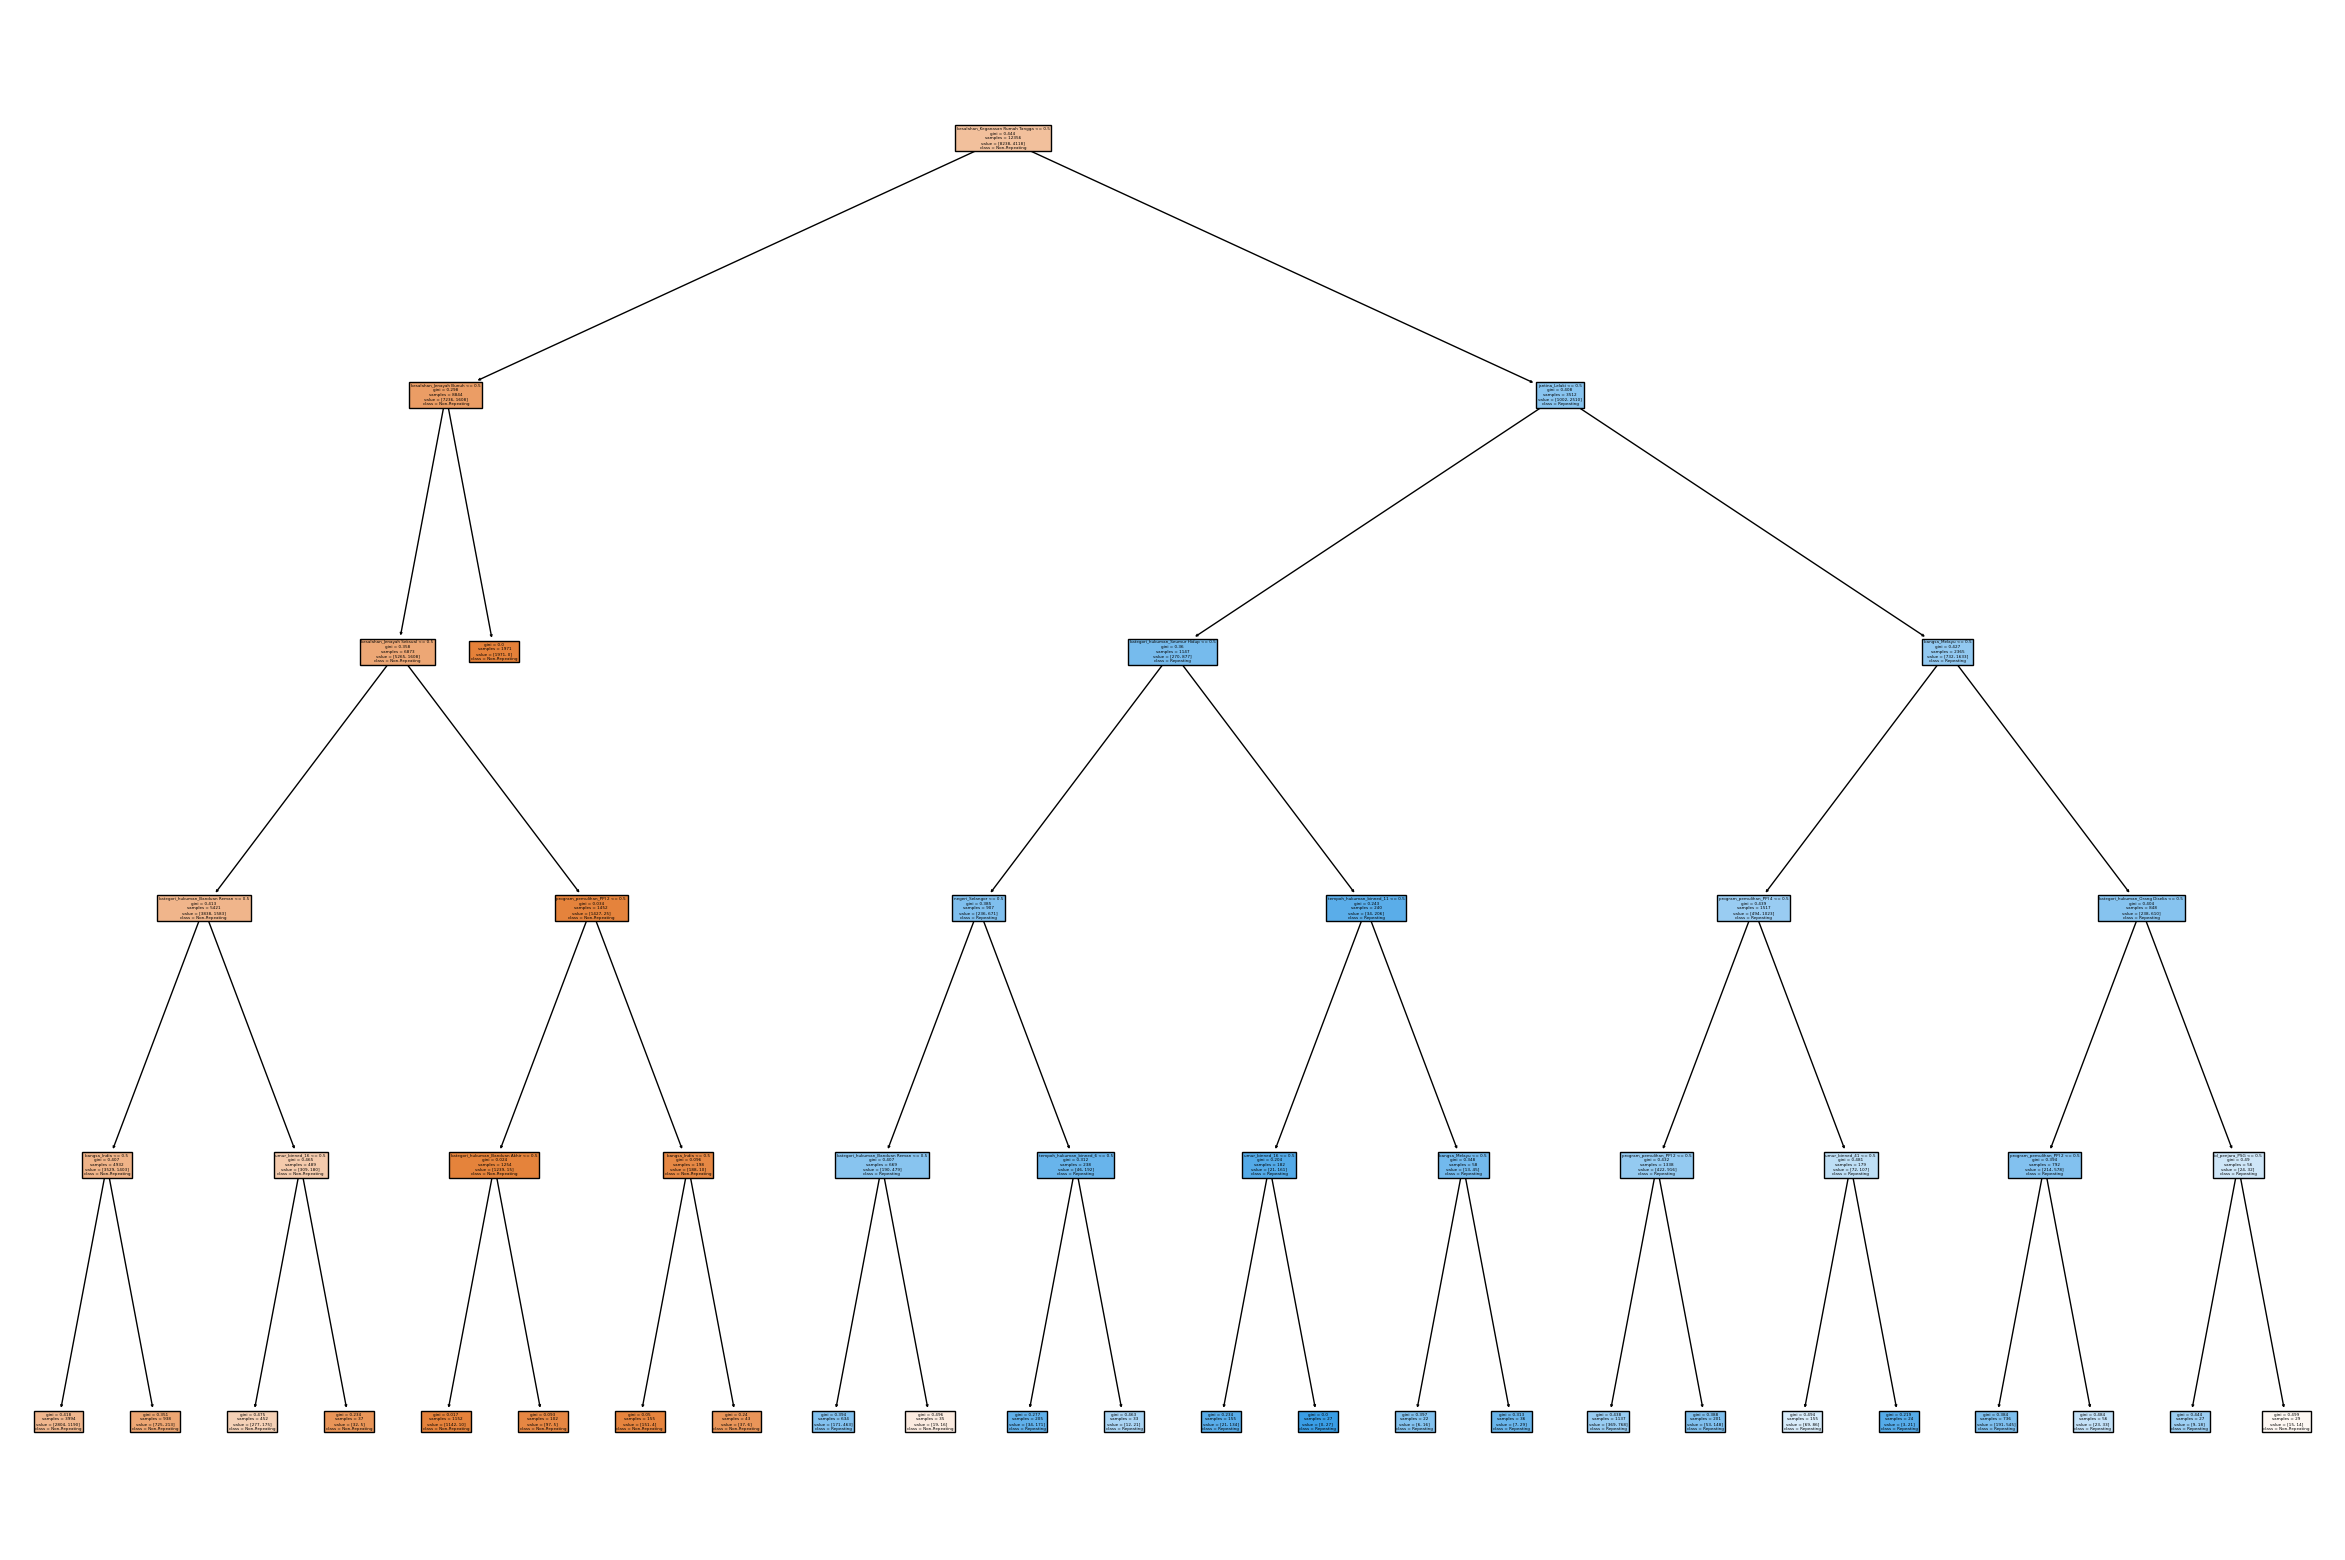

In [55]:
simplified_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=20)
simplified_tree.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(simplified_tree, feature_names=feature_names_list, class_names=["Non-Repeating", "Repeating"], filled=True)
plt.savefig('C:/Users/DataMicron/Desktop/decision_tree_simplified.png', dpi=800)
plt.show()

In [56]:
import plotly.graph_objects as go

# Extracting the tree structure
n_nodes = selected_tree.tree_.node_count
children_left = selected_tree.tree_.children_left
children_right = selected_tree.tree_.children_right
feature = selected_tree.tree_.feature
threshold = selected_tree.tree_.threshold

# Node positions for the plot (this part is tricky and needs a custom approach)
node_x = []
node_y = []
node_text = []

# Example of populating node_x, node_y, node_text
for i in range(n_nodes):
    # Here, you need to implement logic to determine the position of each node
    # and the text you want to display for each node
    pass

# Create Plotly scatter plot for nodes
trace_nodes = go.Scatter(x=node_x, y=node_y, text=node_text, mode='markers+text', textposition='top center')

# Add edges (this also needs a custom approach to calculate start and end points for each edge)

# Define layout
layout = go.Layout(title='Interactive Decision Tree', xaxis=dict(title='X'), yaxis=dict(title='Y'))

# Create figure and add traces
fig = go.Figure(data=[trace_nodes], layout=layout)

# Show the figure
fig.show()


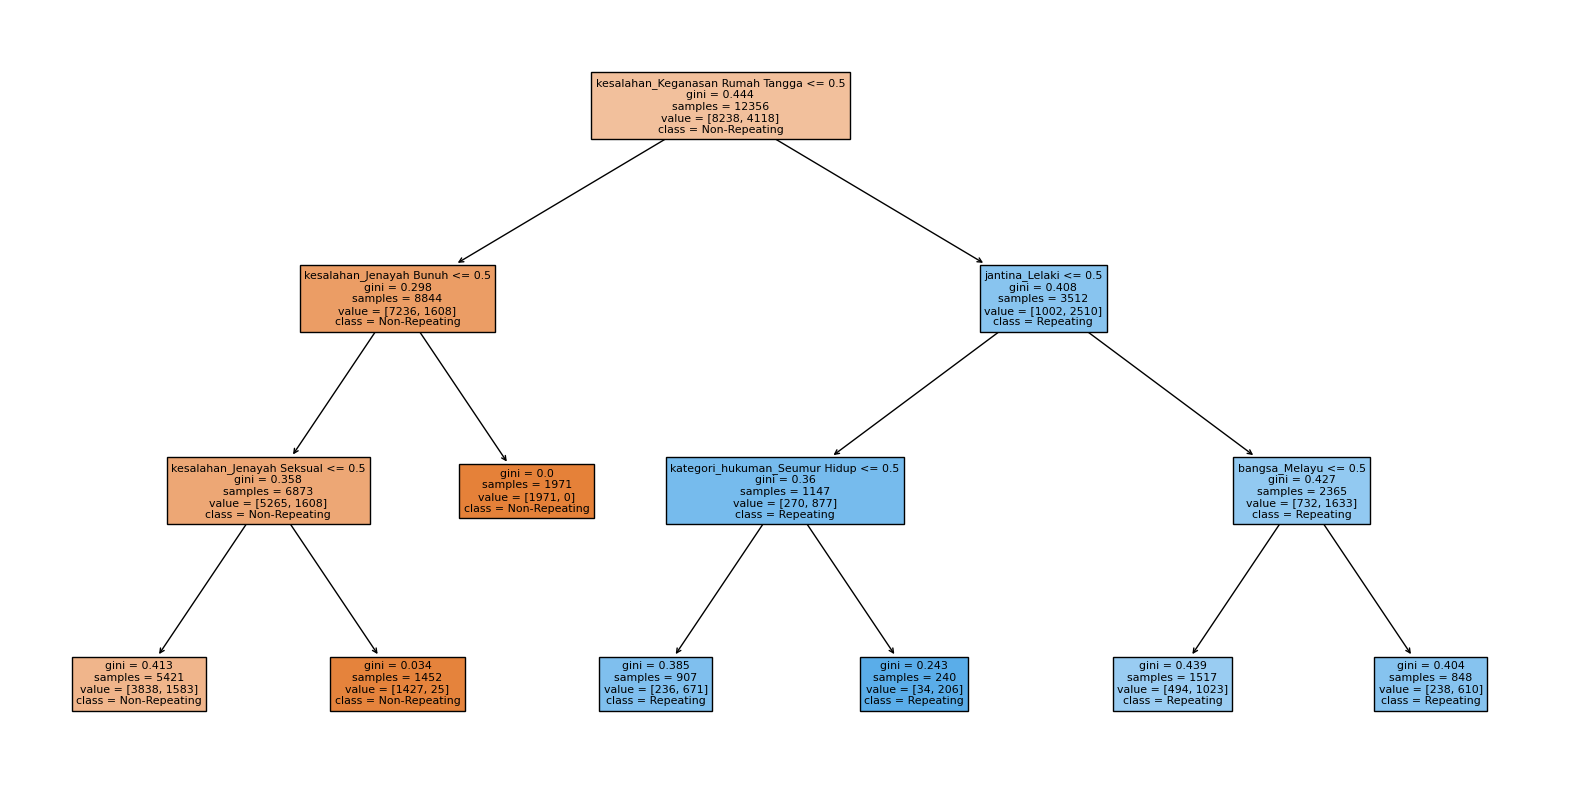

In [57]:
# Train a new tree with limited depth
simplified_tree = DecisionTreeClassifier(max_depth=3)  # Adjust depth as needed
simplified_tree.fit(X_train, y_train)

# Now visualize the simplified tree
plt.figure(figsize=(20, 10))
plot_tree(simplified_tree, feature_names=list(X_train.columns), class_names=["Non-Repeating", "Repeating"], filled=True)
plt.show()